- More recently, a class of networks called ***transformers* with a more flexible way to incorporate past information** has made a big splash.

### 4.5.1 Converting text to numbers
- chatacter level or word level.

In [13]:
import torch
from PIL import Image

In [1]:
with open('../data/p1ch4/jane-austen/1342-0.txt', encoding='utf8') as f:
    text = f.read()

### 4.5.2 One-hot-encoding characters
- It is instrumental to **limit the one-hot encoding to a character set**.
- First split text into a list of lines and pick an arbitrary line to focus on:

In [2]:
lines = text.split('\n')
line = lines[200]
line

'“Impossible, Mr. Bennet, impossible, when I am not acquainted with him'

In [4]:
letter_t = torch.zeros(len(line), 128) # 128 hardcoded due to the limits of ASCII
letter_t.shape

torch.Size([70, 128])

In [5]:
for i, letter in enumerate(line.lower().strip()):
    letter_index = ord(letter) if ord(letter) < 128 else 0
    letter_t[i][letter_index] = 1

### 4.5.3 One-hot encoding whole words
- まだ*embeddings*ではない。

In [9]:
# take text and return it in lowercase and stripped of punctuation.
def clean_words(input_str):
    punctuation = '.,;:"!?”“_-' # ”“は本からコピーしてきた。。。
    word_list = input_str.lower().replace('\n',' ').split()
    word_list = [word.strip(punctuation) for word in word_list]
    return word_list

In [10]:
words_in_line = clean_words(line)
line, words_in_line

('“Impossible, Mr. Bennet, impossible, when I am not acquainted with him',
 ['impossible',
  'mr',
  'bennet',
  'impossible',
  'when',
  'i',
  'am',
  'not',
  'acquainted',
  'with',
  'him'])

- Next, build a mapping of words to indexes in our encoding:

In [11]:
word_list = sorted(set(clean_words(text)))
word2index_dict = {word: i for (i, word) in enumerate(word_list)}

len(word2index_dict), word2index_dict['impossible']

(7261, 3394)

- 上記の一行をone-hot-encodeしてみる：

In [12]:
word_t = torch.zeros(len(words_in_line), len(word2index_dict))
for i, word in enumerate(words_in_line):
    word_index = word2index_dict[word]
    word_t[i][word_index] = 1
    print('{:2} {:4} {}'.format(i, word_index, word))

print(word_t.shape)

 0 3394 impossible
 1 4305 mr
 2  813 bennet
 3 3394 impossible
 4 7078 when
 5 3315 i
 6  415 am
 7 4436 not
 8  239 acquainted
 9 7148 with
10 3215 him
torch.Size([11, 7261])


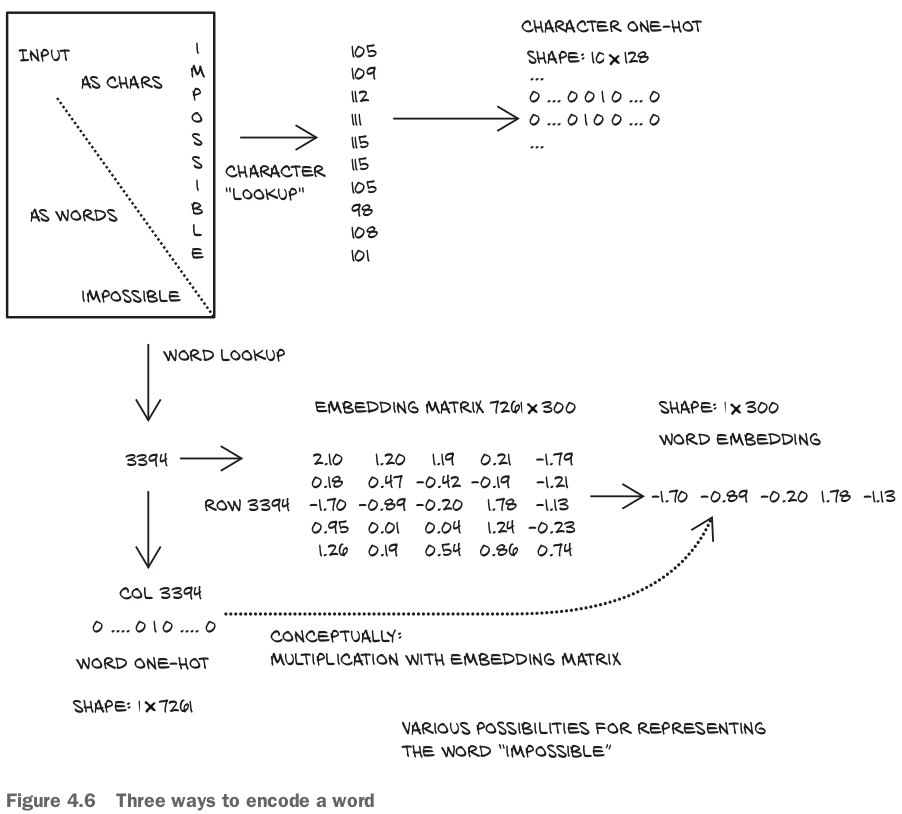

In [15]:
Image.open('img/three-ways-to-encode-word-2020-12-19-15-35-37.png')

- Words convey much more meaning than individual characters, so a representation of words is considerably more informative by itself.
- Given the start contrast between these two options, it is perhaps unsurprising that **intermediate ways** have been sought, found and applied with great success.

### 4.5.4 Text embeddings
- Even worse, every time we encountered a new word, we would have to add a new column to the vector, which would mean **adding a new set of weights to the model** to account for that new vocabulary entry - which would be **painful from a training perspective**.
- How can we compress our encoding down to a **more manageable size** and put a cap on the size growth?
    - Well, instead of vectors of many zeros and a single one, we can use **vectors of floating-point numbers**.
- embeddingにdistanceという概念をつける方法：generate the embedding in such a way that words used in similar contexts mapped to nearby regions of the embedding.

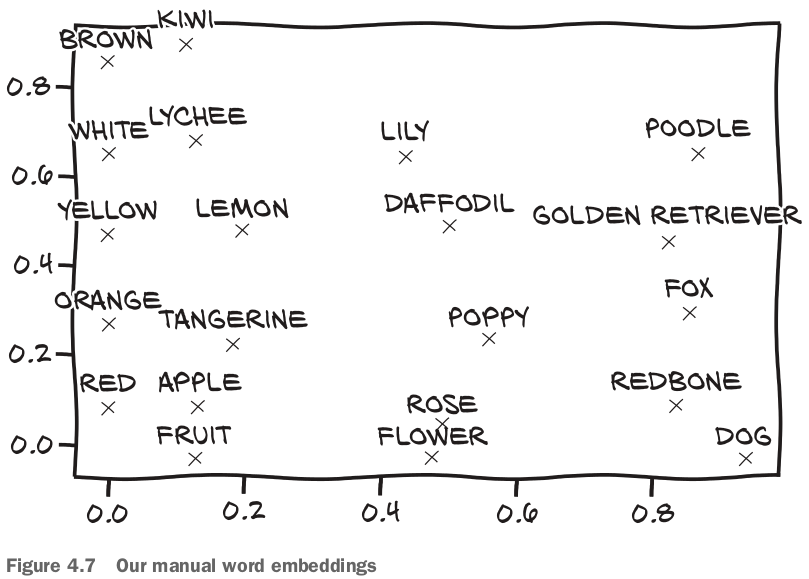

In [16]:
Image.open('img/manual-word-embeddings-2020-12-19-16-26-30.png')

- 自動化後embedding: the main difference are that there are 100 to 1,000 elements in the embedding vector and that **axes do not map directly to concepts**: rather, conceptually similar words map in neighboring regions of an embedding space whose axes are arbitrary floating-point dimensions.
- Embeddings are often generated using neural networks, trying to predict a word from nearby words (the context) in a sentence. 
    - In this case, we could start from one-hot-encoded words and use a (usually rather shallow) neural network to generate the embedding. KerasにEmbeddingというlayerがある。
    
### 4.5.5 Text embeddings as a blueprint
- **Embeddings are useful wherever one-hot encoding becomes cumbersome(面倒)**.
- When we are interested in **co-occurrences of observations**, the word embeddings can serve as a blueprint, too.
    - For example, recommender systems use the items the customer already interacted with as the context for predicting what else will spark interest.
- Processing text is perhaps the most common, well-explored task dealing with sequences; so when working on tasks with time series, we might look for inspiration in what is done in natural language processing.